<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day1 and Day 2)
                    </b>
                </font>
            </div>
        </td>
        <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

#### Import the required libraries

In [206]:
# type your code here
import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve,classification_report,cohen_kappa_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm

#### Read the data

Load the csv file and print the first five observations.

In [6]:
# type your code here
df = pd.read_csv('bank_churn.csv')
df.head(3)

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1


In [8]:
df.shape

(9920, 9)

In [9]:
df.isnull().sum().sum()

0

Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [10]:
# type your code here

In [12]:
df['Closed_Acc'].value_counts(normalize = True)

0    0.796169
1    0.203831
Name: Closed_Acc, dtype: float64

Yes , data is unbalanced

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
# type your code here

In [66]:
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)
dmy = pd.get_dummies(cat)

final = pd.concat([num,dmy],axis = 1)
final = final.drop('Closed_Acc', axis = 1)
final = sm.add_constant(final)
df_target = df['Closed_Acc']
X_train, X_test, y_train, y_test = train_test_split(final, df_target, random_state = 10, test_size = 0.2)

In [67]:
logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.441001
         Iterations 7


In [68]:
odds = pd.DataFrame(np.exp(logreg.params),columns = ['value'])
odds[odds['value'] > 0.25]

,value
CreditScore,0.999683
Age,1.073698
NumOfYrsWithBank,0.993663
Balance,1.000002
NumOfProducts,0.902667
HasCrCard,0.989693
Geography_France,0.366202
Geography_Germany,0.836113
Geography_Spain,0.366375
Gender_Female,0.438715


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [69]:
# type your code here

In [72]:
y_pred = logreg.predict(X_test)
y_pred = y_pred.apply(lambda x: 1 if x > 0.5 else 0)

In [76]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1503,   70],
       [ 347,   64]], dtype=int64)

In [77]:
sensitivity = cm[1][1]/(cm[1][0] + cm[1][1])
sensitivity

0.15571776155717762

In [78]:
specificity = cm[0][0]/(cm[0][0] + cm[0][1])
specificity

0.9554990464081373

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [79]:
# type your code here

In [103]:
logreg4 = LogisticRegression()
rfe_model = RFE(estimator=logreg4, n_features_to_select=6)

final = pd.concat([num,dmy],axis = 1)
final = final.drop('Closed_Acc', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(final, df_target, random_state = 10, test_size = 0.2)

rfe_model = rfe_model.fit(X_train,y_train)


In [104]:
rfe_ranks = pd.DataFrame({'features':X_test.columns, 'rank': rfe_model.ranking_})

In [105]:
rfe_ranks = rfe_ranks.sort_values('rank')
rfe_ranks = rfe[rfe['rank'] == 1]

##### building model using thoe features

In [125]:
X_rfe = final[rfe_ranks.features]
y = df['Closed_Acc']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, random_state = 10, test_size = 0.2)


In [139]:
rfe_model = rfe_model.fit(X_train,y_train)

In [141]:
y_pred = rfe_model.predict(X_test)

In [142]:
accuracy_score(y_test,y_pred)

0.7928427419354839

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [143]:
# type your code here

In [144]:
num = df.select_dtypes(include = np.number)
cat = df.select_dtypes(exclude = np.number)
dmy = pd.get_dummies(cat)

final = pd.concat([num,dmy],axis = 1)
final = final.drop('Closed_Acc', axis = 1)
final = sm.add_constant(final)
df_target = df['Closed_Acc']
X_train, X_test, y_train, y_test = train_test_split(final, df_target, random_state = 10, test_size = 0.2)

In [145]:
lr = LogisticRegression()
model5 = lr.fit(X_train, y_train)

In [147]:
y_pred_prob = model5.predict_proba(X_test)

In [149]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [161]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['diff'] = youdens_table['TPR']-youdens_table['FPR']

In [162]:
youdens_table.sort_values('diff',ascending = False).head(2)

,TPR,FPR,Threshold,diff
307,0.586375,0.309599,0.223233,0.276775
309,0.591241,0.315957,0.221530,0.275284


In [163]:
# 0.223233 is the best cutoff

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [187]:
y_pred_youden = [ 0 if x < 0.22 else 1 for x in y_pred_prob[:,1]]

In [188]:
accuracy_score(y_test, y_pred_youden)

0.6602822580645161

In [189]:
print(classification_report(y_test, y_pred_youden))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1573
           1       0.32      0.59      0.42       411

    accuracy                           0.66      1984
   macro avg       0.59      0.64      0.59      1984
weighted avg       0.75      0.66      0.69      1984



In [190]:
cohen_kappa_score(y_test, y_pred_youden)

0.20785078485337838

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [191]:
# type your code here

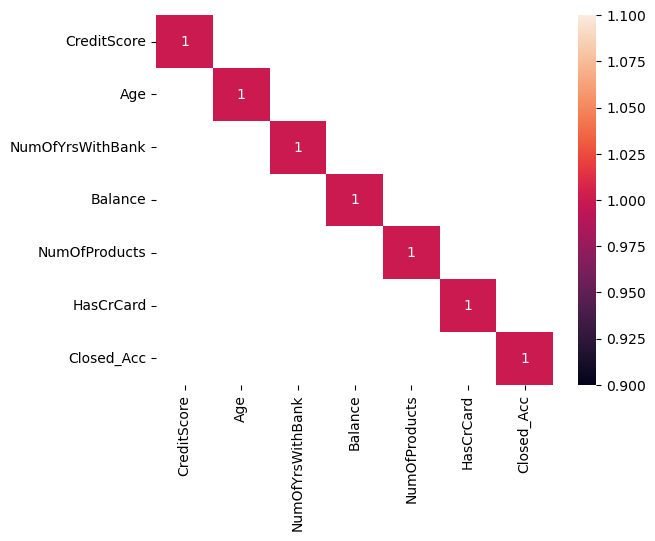

In [198]:
sns.heatmap(df.corr()[df.corr() > 0.7], annot = True)
plt.show()

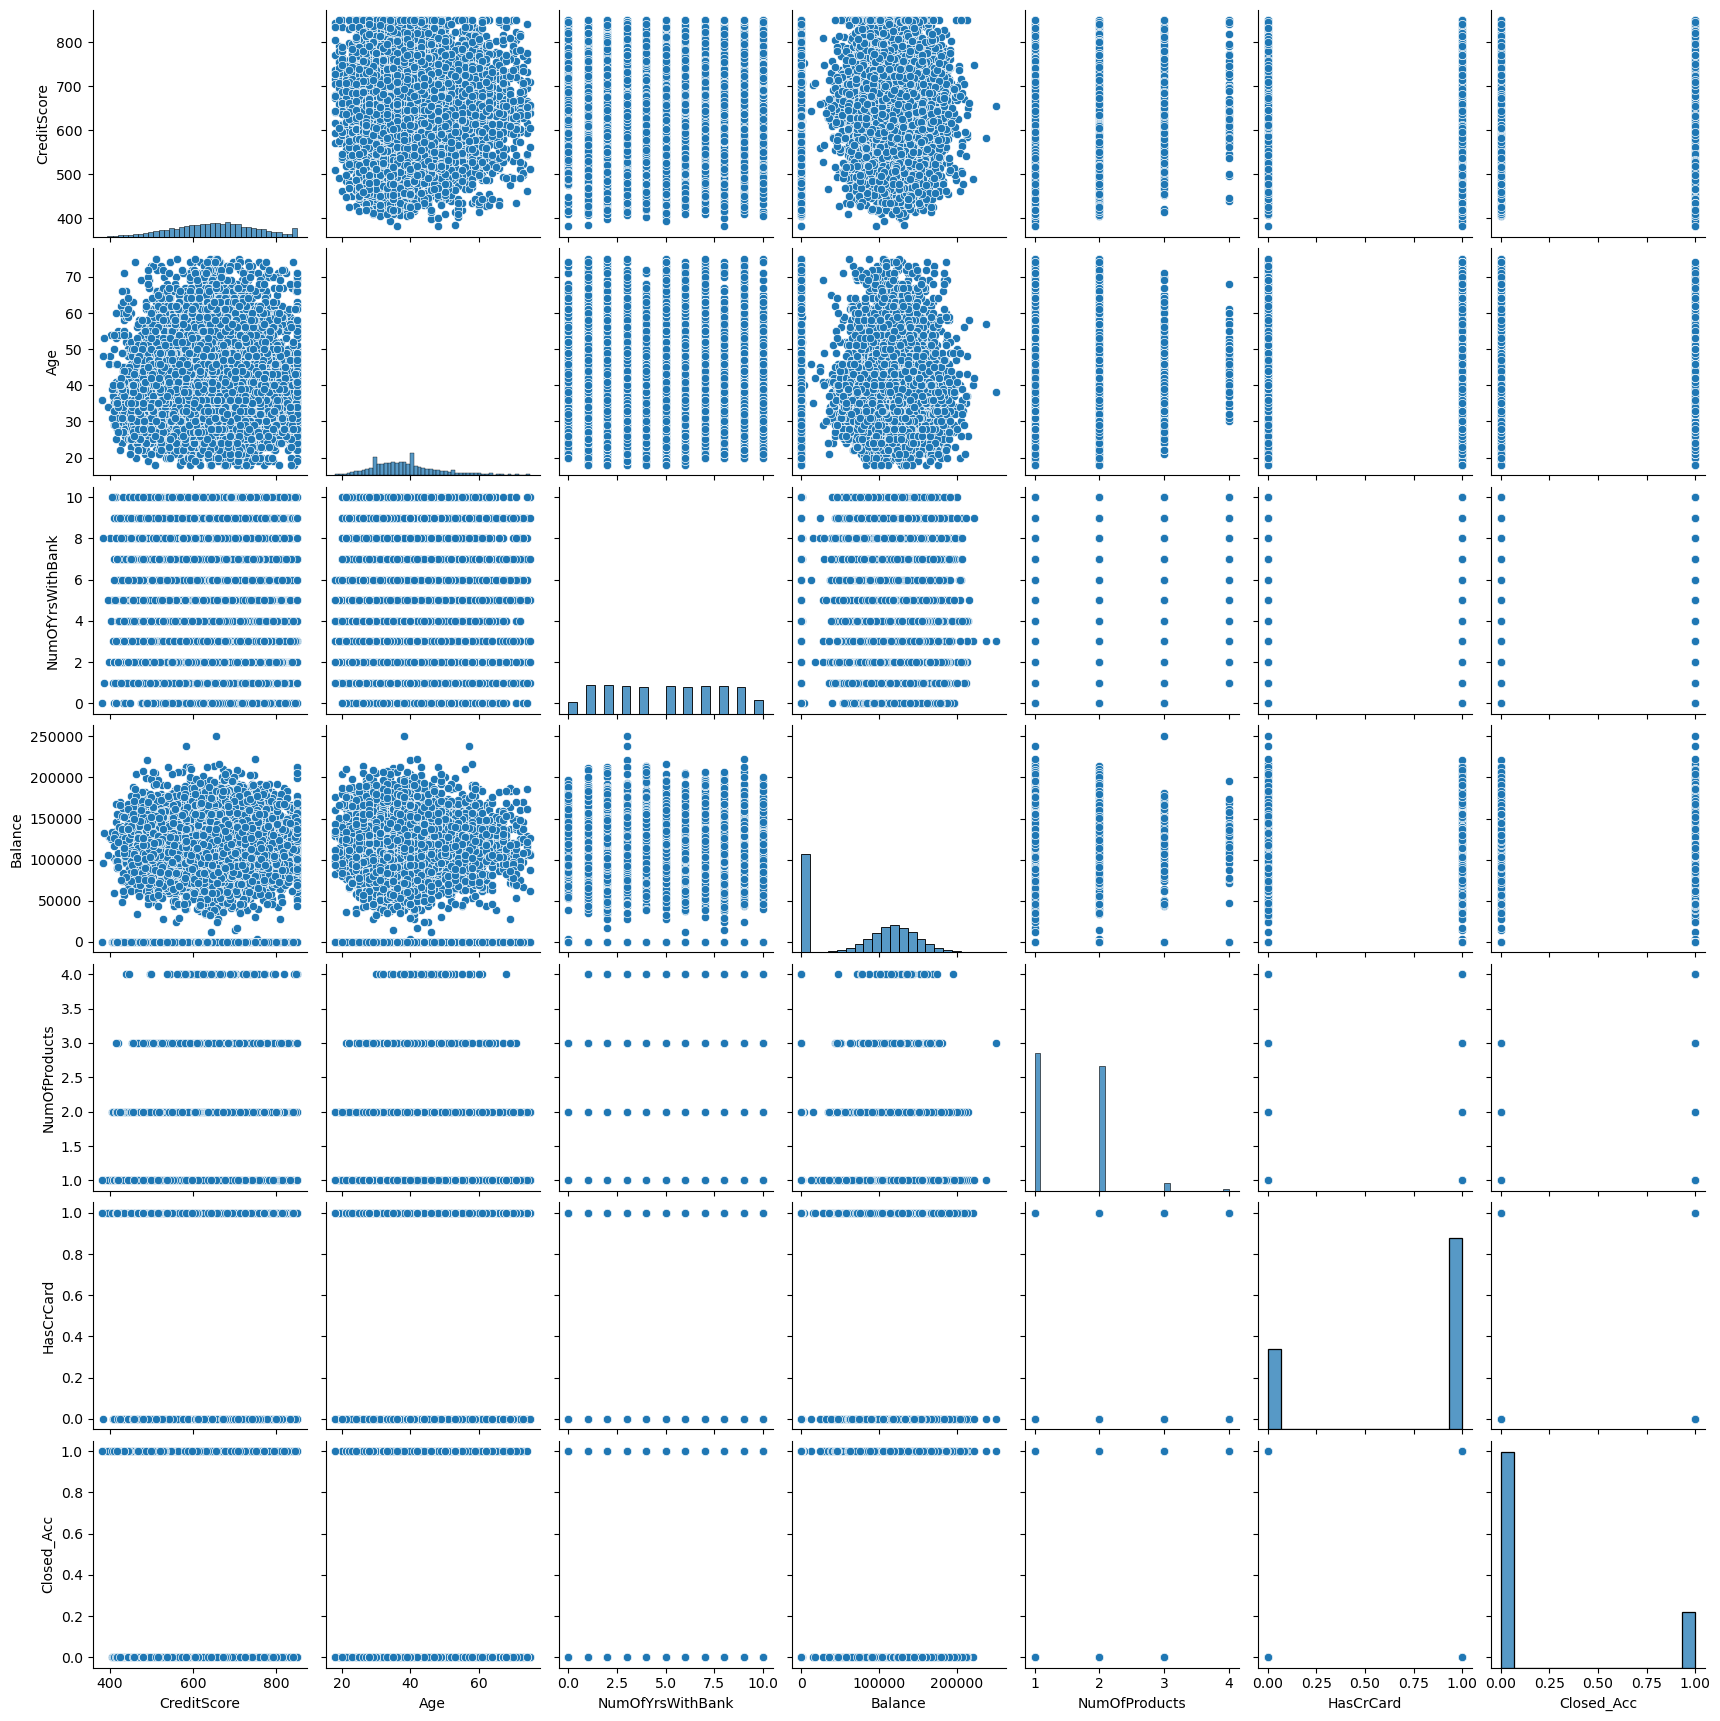

In [200]:
sns.pairplot(df)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [201]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [212]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here